In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import imutils

ModuleNotFoundError: No module named 'imutils'

In [2]:
pip install imutils

  Using cached imutils-0.5.4.tar.gz (17 kB)
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25872 sha256=ccb4493520205cab1d084db4d7cd624f594d09a88a4914e84089ac31b3350ee8
  Stored in directory: c:\users\shekh\appdata\local\pip\cache\wheels\4b\a5\2d\4a070a801d3a3d93f033d3ee9728f470f514826e89952df3ea
Successfully built imutils
Note: you may need to restart the kernel to use updated packages.


In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import imutils

In [24]:
clusters = 3 # try changing it

In [40]:
img = cv2.imread('C:/Users/shekh/OneDrive/Desktop/PHOTO.jpg')
org_img = img.copy()
print('Org image shape --> ',img.shape)


Org image shape -->  (1280, 1016, 3)


In [41]:
img = imutils.resize(img,height=200)
print('After resizing shape --> ',img.shape)

After resizing shape -->  (200, 158, 3)


In [42]:
flat_img = np.reshape(img,(-1,3))
print('After Flattening shape --> ',flat_img.shape)


After Flattening shape -->  (31600, 3)


In [43]:
kmeans = KMeans(n_clusters=clusters,random_state=0)
kmeans.fit(flat_img)

KMeans(n_clusters=3, random_state=0)

In [44]:
dominant_colors = np.array(kmeans.cluster_centers_,dtype='uint')

In [45]:
percentages = (np.unique(kmeans.labels_,return_counts=True)[1])/flat_img.shape[0]
p_and_c = zip(percentages,dominant_colors)
p_and_c = sorted(p_and_c,reverse=True)

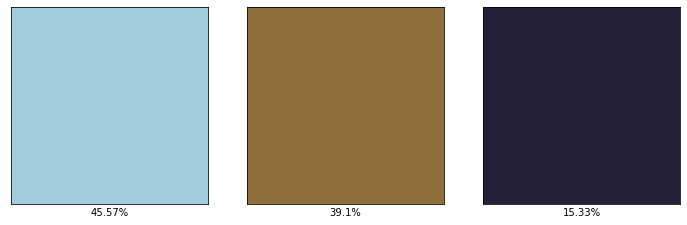

In [46]:
block = np.ones((50,50,3),dtype='uint')
plt.figure(figsize=(12,8))
for i in range(clusters):
    plt.subplot(1,clusters,i+1)
    block[:] = p_and_c[i][1][::-1] # we have done this to convert bgr(opencv) to rgb(matplotlib) 
    plt.imshow(block)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(str(round(p_and_c[i][0]*100,2))+'%')

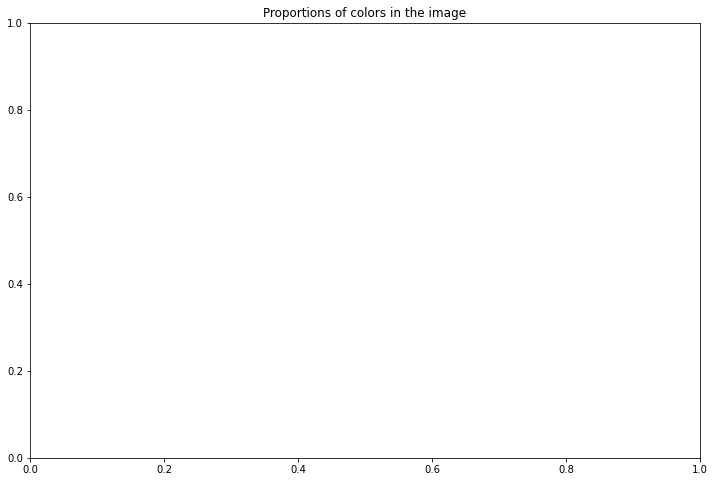

In [47]:
bar = np.ones((50,500,3),dtype='uint')
plt.figure(figsize=(12,8))
plt.title('Proportions of colors in the image')
start = 0
i = 1
for p,c in p_and_c:
    end = start+int(p*bar.shape[1])
    if i==clusters:
        bar[:,start:] = c[::-1]
    else:
        bar[:,start:end] = c[::-1]
    start = end
    i+=1

([], [])

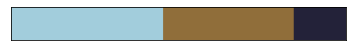

In [48]:
plt.imshow(bar)
plt.xticks([])
plt.yticks([])

In [49]:
rows = 1000
cols = int((org_img.shape[0]/org_img.shape[1])*rows)
img = cv2.resize(org_img,dsize=(rows,cols),interpolation=cv2.INTER_LINEAR)


In [50]:
copy = img.copy()
cv2.rectangle(copy,(rows//2-250,cols//2-90),(rows//2+250,cols//2+110),(255,255,255),-1)


array([[[230, 215, 182],
        [230, 215, 182],
        [230, 216, 180],
        ...,
        [229, 215, 167],
        [230, 216, 168],
        [231, 217, 169]],

       [[230, 215, 182],
        [230, 215, 182],
        [230, 216, 180],
        ...,
        [228, 214, 166],
        [229, 215, 167],
        [229, 215, 167]],

       [[229, 215, 179],
        [229, 215, 179],
        [230, 216, 180],
        ...,
        [227, 213, 165],
        [227, 213, 165],
        [228, 214, 166]],

       ...,

       [[225, 203, 161],
        [224, 203, 158],
        [224, 202, 160],
        ...,
        [146, 124, 107],
        [167, 145, 125],
        [176, 155, 134]],

       [[225, 204, 159],
        [225, 205, 158],
        [224, 203, 158],
        ...,
        [145, 123, 105],
        [166, 145, 124],
        [178, 157, 136]],

       [[225, 205, 158],
        [225, 205, 158],
        [225, 205, 158],
        ...,
        [143, 122, 103],
        [166, 145, 124],
        [179, 158, 137]]

In [51]:
final = cv2.addWeighted(img,0.1,copy,0.9,0)
cv2.putText(final,'Most Dominant Colors in the Image',(rows//2-230,cols//2-40),cv2.FONT_HERSHEY_DUPLEX,0.8,(0,0,0),1,cv2.LINE_AA)

array([[[230, 215, 182],
        [230, 215, 182],
        [230, 216, 180],
        ...,
        [229, 215, 167],
        [230, 216, 168],
        [231, 217, 169]],

       [[230, 215, 182],
        [230, 215, 182],
        [230, 216, 180],
        ...,
        [228, 214, 166],
        [229, 215, 167],
        [229, 215, 167]],

       [[229, 215, 179],
        [229, 215, 179],
        [230, 216, 180],
        ...,
        [227, 213, 165],
        [227, 213, 165],
        [228, 214, 166]],

       ...,

       [[225, 203, 161],
        [224, 203, 158],
        [224, 202, 160],
        ...,
        [146, 124, 107],
        [167, 145, 125],
        [176, 155, 134]],

       [[225, 204, 159],
        [225, 205, 158],
        [224, 203, 158],
        ...,
        [145, 123, 105],
        [166, 145, 124],
        [178, 157, 136]],

       [[225, 205, 158],
        [225, 205, 158],
        [225, 205, 158],
        ...,
        [143, 122, 103],
        [166, 145, 124],
        [179, 158, 137]]

In [52]:
start = rows//2-220
for i in range(5):
    end = start+70
    final[cols//2:cols//2+70,start:end] = p_and_c[i][1]
    cv2.putText(final,str(i+1),(start+25,cols//2+45),cv2.FONT_HERSHEY_DUPLEX,1,(255,255,255),1,cv2.LINE_AA)
    start = end+20

IndexError: list index out of range

In [53]:
plt.show()

In [54]:
cv2.imshow('img',final)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('output.png',final)

True